In [2]:
import sys
print(sys.version)

3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]


In [3]:
import splitfolders

In [4]:
splitfolders.ratio('dataset', output="output", seed=1337, ratio=(.8, 0.2))
print("Dataset splitting completed!")

Dataset splitting completed!


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES=True
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
training_set=train_datagen.flow_from_directory('output/train',
                                               target_size=(224,224),
                                               batch_size=64,
                                               class_mode='categorical')
test_set=test_datagen.flow_from_directory('output/val',
                                          target_size=(224,224),
                                          batch_size=64,
                                          class_mode='categorical')

Found 3372 images belonging to 4 classes.
Found 845 images belonging to 4 classes.


In [8]:
IMAGE_SIZE=[224, 224]
VGG19 = VGG19(input_shape=IMAGE_SIZE+[3], weights='imagenet', include_top=False)

In [9]:
for layer in VGG19.layers:
    layer.trainable=False

In [10]:
x=Flatten()(VGG19.output)

In [11]:
prediction=Dense(4,activation='softmax')(x)

In [12]:
model = Model(inputs=VGG19.input, outputs=prediction)

In [13]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,124,740 (76.77 MB)

 Trainable params: 100,356 (392.02 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
from PIL import Image
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.4672 - loss: 1.5951  

C:\Users\91934\jupyter_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


53/53 ━━━━━━━━━━━━━━━━━━━━ 422s 8s/step - accuracy: 0.4697 - loss: 1.5856 - val_accuracy: 0.7112 - val_loss: 0.6814
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 402s 8s/step - accuracy: 0.7499 - loss: 0.6072 - val_accuracy: 0.7621 - val_loss: 0.6130
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 400s 8s/step - accuracy: 0.7870 - loss: 0.5469 - val_accuracy: 0.6935 - val_loss: 0.7288
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 399s 8s/step - accuracy: 0.8147 - loss: 0.4884 - val_accuracy: 0.7302 - val_loss: 0.6945
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 393s 7s/step - accuracy: 0.8173 - loss: 0.4541 - val_accuracy: 0.8343 - val_loss: 0.4418
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 392s 7s/step - accuracy: 0.8232 - loss: 0.4560 - val_accuracy: 0.7420 - val_loss: 0.6528
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 391s 7s/step - accuracy: 0.8287 - loss: 0.4196 - val_accuracy: 0.7136 - val_loss: 0.7176
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 391s 7s/step - accuracy: 0.8311 - loss: 0.4268 - val_accuracy: 0.7396 - val_loss: 0.

In [17]:
model.save('evgg.h5')

In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
model=load_model("evgg.h5")

In [36]:
img=image.load_img(r"C:\Users\91934\OneDrive\Desktop\SmartBridge\output\val\normal\2567_left.jpg",target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
preds=model.predict(x)
pred=np.argmax(preds,axis=1)
index=['cataract','diabetic_retinopathy','glaucoma','normal']
result=str(index[pred[0]])
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


'normal'

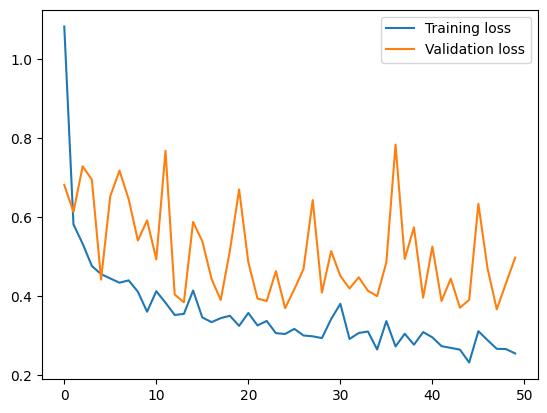

In [38]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='Training loss')
plt.plot(r.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()